<a href="https://colab.research.google.com/github/Rishabhjain2003/Sales-Analysis/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

data = pd.read_csv('/content/Stores.csv')

data = data.iloc[:, 1:]

print(data)
print(data.columns)

     Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0          1659             1961                   530        66490
1          1461             1752                   210        39820
2          1340             1609                   720        54010
3          1451             1748                   620        53730
4          1770             2111                   450        46620
..          ...              ...                   ...          ...
891        1582             1910                  1080        66390
892        1387             1663                   850        82080
893        1200             1436                  1060        76440
894        1299             1560                   770        96610
895        1174             1429                  1110        54340

[896 rows x 4 columns]
Index(['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales'], dtype='object')


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

model = LinearRegression()

scaler = StandardScaler()

X = data.drop(columns = ['Store_Sales'])
y = data['Store_Sales']

print(X)
print(y)

x_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

     Store_Area  Items_Available  Daily_Customer_Count
0          1659             1961                   530
1          1461             1752                   210
2          1340             1609                   720
3          1451             1748                   620
4          1770             2111                   450
..          ...              ...                   ...
891        1582             1910                  1080
892        1387             1663                   850
893        1200             1436                  1060
894        1299             1560                   770
895        1174             1429                  1110

[896 rows x 3 columns]
0      66490
1      39820
2      54010
3      53730
4      46620
       ...  
891    66390
892    82080
893    76440
894    96610
895    54340
Name: Store_Sales, Length: 896, dtype: int64


In [3]:
model.fit(X_train, y_train)

LinearRegression()

In [4]:
predictions = model.predict(X_test)
print(predictions)
print(y_test)

[63638.69560129 60096.607139   60198.13595743 59720.07654173
 61919.7202304  57742.17988823 60571.04813657 59894.74605204
 58705.90170306 62222.89722317 61358.68766865 57883.41524909
 57655.71432033 58301.48046593 57974.55329805 57786.53282398
 60217.91726274 59394.87991078 58507.29806203 58789.92962426
 61063.04323369 62343.61200539 58686.64809995 58988.36169528
 62968.92397584 58077.38538336 59995.03553313 56950.82295298
 58714.2549813  60717.55100539 58551.68863059 56442.82922701
 60284.12723444 59628.16797709 59082.36084784 58356.04229191
 59389.47846563 57860.57291975 59072.39868989 60573.96914757
 58867.28573189 57382.88344402 62001.48764978 59423.05851761
 59933.43390167 61744.85295672 57770.23518174 60037.39263488
 58964.94114437 63072.303146   59482.6304954  60561.40190069
 58180.04589867 62092.03324914 60817.62839172 58441.33203403
 58791.21598245 56992.14063781 60021.63176824 59356.53911994
 59970.00002668 58101.7373961  60276.13782032 58099.94571593
 58811.86368757 59058.67

In [5]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)

print("R² score:", r2)

R² score: 0.01106653162925586


In [7]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)

print("Mean squared error:", mse)

Mean squared error: 279730718.72163635


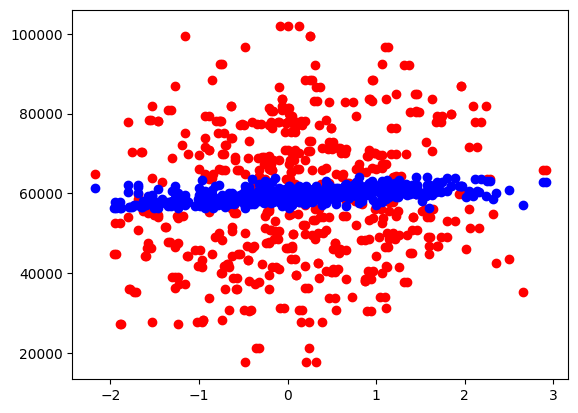

In [14]:
import matplotlib.pyplot as plt

plt.plot(X_test, y_test, 'ro')
plt.plot(X_test, predictions, 'bo')
plt.show()

In [9]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state=116)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Predicted values:", y_pred)

Predicted values: [78486.7 68961.1 66561.7 61776.  67307.8 65425.8 59771.1 54007.7 54605.4
 67786.6 59963.1 57876.  54947.8 40680.8 48149.5 63860.4 51872.  56389.7
 48590.4 47761.5 68712.1 68296.  53505.5 42215.3 75060.5 50207.9 56363.8
 71213.3 58359.5 65891.2 52381.8 63599.3 44249.2 67171.9 51559.  51738.9
 69212.4 51077.2 56031.7 61027.3 56162.7 63976.5 56468.2 56644.8 58383.3
 59464.6 68353.2 74490.  57285.7 71034.1 66778.5 68567.5 54017.4 65813.
 67542.3 50688.4 68030.6 61180.8 63854.  47975.2 53492.5 55966.7 67674.1
 56254.  56007.3 53775.7 54390.  64226.3 49351.6 54631.6 56850.9 49757.5
 56384.4 50589.4 54190.1 54456.5 55556.2 63904.6 74495.5 52248.4 55524.3
 67931.5 59628.7 62577.5 70805.1 59124.1 63833.5 54244.7 60473.6 64421.7
 58161.7 71047.2 62705.2 54928.7 68678.6 63356.2 61085.8 60689.9 51805.6
 57951.5 52746.6 66483.4 43135.2 56847.4 61709.  67755.8 69634.4 72324.3
 60312.5 47009.7 54756.2 67193.1 56857.6 62583.3 67309.  40711.  45065.4
 51675.9 48866.6 56930.5 63571.4 5

In [10]:
r2 = r2_score(y_test, y_pred)

print("R² score:", r2)

R² score: -0.2203850366362181


In [11]:
mse = mean_squared_error(y_test, y_pred)

print("Mean squared error:", mse)

Mean squared error: 345199342.8615556


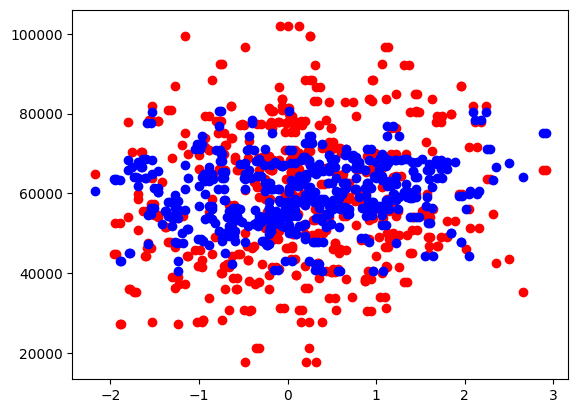

In [13]:
plt.plot(X_test, y_test, 'ro')
plt.plot(X_test, y_pred, 'bo')
plt.show()